# Classification of COVID-19 Xray

### Table of Content
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
   - 3.1 Visual Inspection of Image Samples
   - 3.2 Image Dimension Analysis and Visualization
   - 3.3 Data Cleaning and Augmentation
4. Model Architecture
   - 4.1 Description of the Model Architecture
   - 4.2 Key Features and Functionality of ModelTrainer
   - 4.3 Batch Execution of Model Training
   - 4.4 Hyperparameter Tuning
5. Results and Analysis
   - 5.1 Performance Metrics
   - 5.2 Performance Analysis
   - 5.3 Troubleshooting Steps
   - 5.4 Hyperparameter Optimization Procedure
6. Conclusion
   - 6.1 Summary of Results
   - 6.2 Learning and Takeaways
   - 6.3 Analysis of Failures
   - 6.4 Suggestions for Improvement
7. References


## 1. Introduction

### Project Overview

This project aims to develop a deep learning model to classify chest X-ray images into two categories: NORMAL and PNEUMONIA. The significance of this project lies in its potential to aid in the timely and accurate diagnosis of pneumonia, which is crucial for effective treatment and management, especially in the context of COVID-19 where rapid identification of pneumonia cases can help in better patient care and control of the pandemic.

### Problem Description

Pneumonia is an infection that inflames the air sacs in one or both lungs, which can be detected through chest X-rays. However, manual interpretation of X-ray images by radiologists can be time-consuming and subject to variability. The challenge is to automate this process using a Convolutional Neural Network (CNN) to accurately classify chest X-rays. Accurate classification is critical to minimize false negatives, which can lead to untreated cases, and false positives, which can cause unnecessary treatment and stress on healthcare systems.

### Objective

The primary objective of this project is to build and evaluate a CNN model that can effectively classify chest X-ray images as either NORMAL or PNEUMONIA. The specific goals include:
 - Preprocessing the dataset to ensure it is suitable for training and evaluation.
 - Performing exploratory data analysis (EDA) to understand the dataset characteristics.
 - Designing and implementing a CNN model architecture tailored to this classification problem.
 - Tuning hyperparameters to optimize model performance.
 - Evaluating the model using appropriate metrics to ensure it meets the desired accuracy and reliability.
 - Providing a detailed analysis of the model’s performance, troubleshooting any issues, and suggesting potential improvements for future work.

## 2. Data Description

This dataset provides a valuable resource for training models to differentiate between normal and pneumonia-affected lungs, potentially aiding in the early detection of COVID-19 through radiological imaging. 

### Folder Structure and File Details

The COVID-19 Xray Dataset is organized into training and testing sets, each containing images from two categories: NORMAL and PNEUMONIA. The folder structure is as follows:

- `data/test/NORMAL`
- `data/test/PNEUMONIA`
- `data/train/NORMAL`
- `data/train/PNEUMONIA`

| Folder          | Number of Files | File Format | Image Dimensions |
|-----------------|-----------------|-------------|------------------|
| test/NORMAL     | 20              | JPEG        | (2244, 2030)     |
| test/PNEUMONIA  | 20              | JPEG        | (1294, 1022)     |
| train/NORMAL    | 74              | JPEG        | (1740, 1246)     |
| train/PNEUMONIA | 74              | JPEG        | (882, 876)       |

**Total Data Size:** 85.24 MB

### Category-wise Summary

| Category        | Number of Samples | Mean Dimensions                          | Dimension Standard Deviation                   |
|-----------------|-------------------|------------------------------------------|------------------------------------------------|
| Train Normal    | 74                | [1539.7, 1968.1, 3.0]                    | [445.3, 337.95, 0.0]                           |
| Train Pneumonia | 74                | [1231.3, 1427.0, 3.0]                    | [842.95, 953.89, 0.0]                          |
| Test Normal     | 20                | [1656.35, 2049.75, 3.0]                  | [323.63, 237.64, 0.0]                          |
| Test Pneumonia  | 20                | [1536.65, 1605.7, 3.0]                   | [186.91, 229.14, 0.0]                          |

### Key Points

- The dataset contains a total of 188 images, with 94 images in the training set (74 NORMAL and 74 PNEUMONIA) and 40 images in the test set (20 NORMAL and 20 PNEUMONIA).
- Images are in JPEG format, with varying dimensions.
- The mean dimensions and standard deviations for each category indicate a diversity in image sizes, which may require resizing or normalization during preprocessing.
- The dataset size is 85.24 MB, making it manageable for typical machine learning and deep learning workflows.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Visual Inspection of Image Samples

This block of code is designed to display sample images from the training dataset for visual inspection. It defines a function display_samples that takes a folder name and a label as inputs, selects a specified number of images from the folder, and displays them in a row using Matplotlib. The function is called twice to display samples from the 'NORMAL' and 'PNEUMONIA' categories.

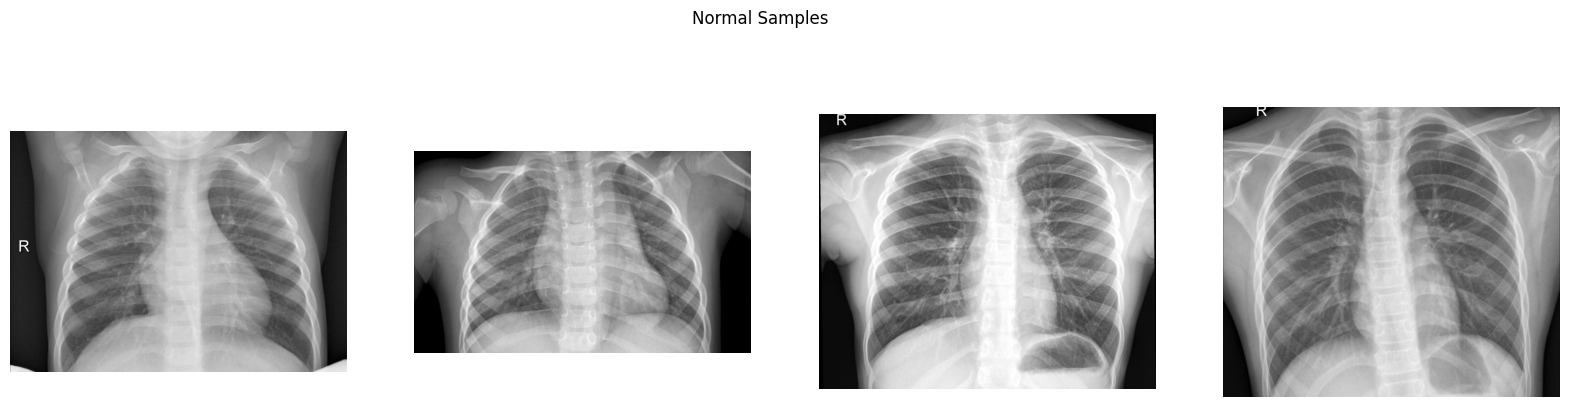

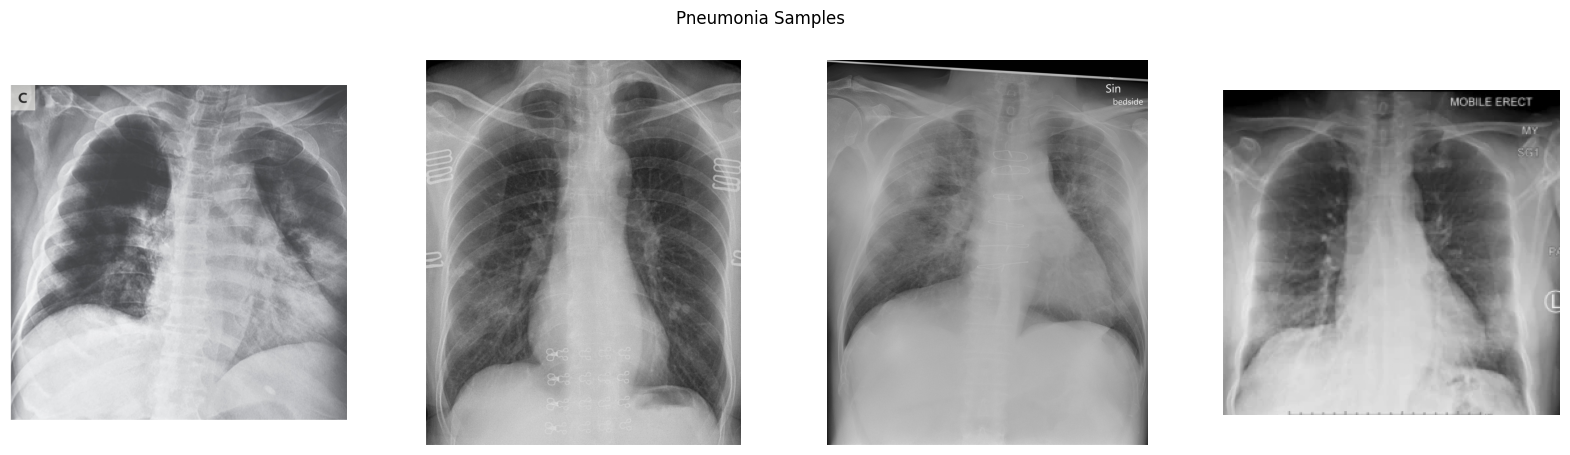

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def display_samples(folder, label, num_samples=4):
    folder_path = f'data/train/{folder}'
    images = os.listdir(folder_path)[:num_samples]
    
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    fig.suptitle(f'{label} Samples')
    
    for img, ax in zip(images, axes):
        img_path = os.path.join(folder_path, img)
        image = mpimg.imread(img_path)
        ax.imshow(image, cmap='gray')
        ax.axis('off')

display_samples('NORMAL', 'Normal')
display_samples('PNEUMONIA', 'Pneumonia')
plt.show()


### 3.2 Image Dimension Analysis and Visualization

This block of code collects the dimensions of images from four categories (train/normal, train/pneumonia, test/normal, test/pneumonia) and plots histograms to visualize the distribution of image heights and widths. It reads the image files, extracts their dimensions, converts the collected dimensions into NumPy arrays for easy manipulation, and then plots histograms to display the frequency distribution of the image sizes.

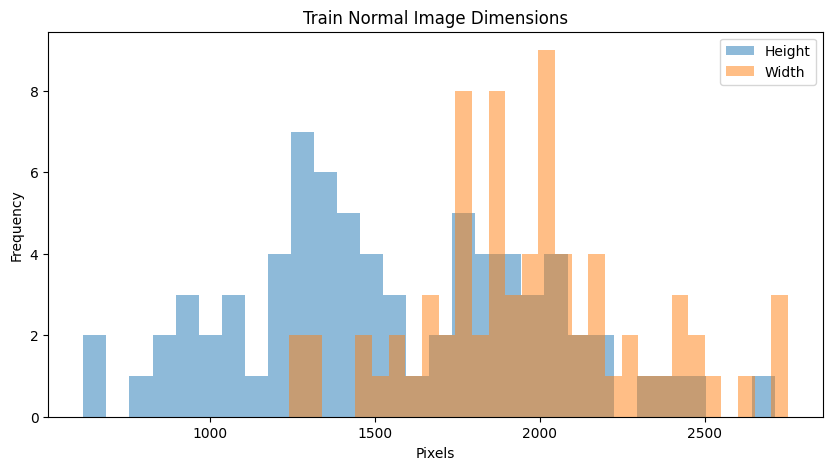

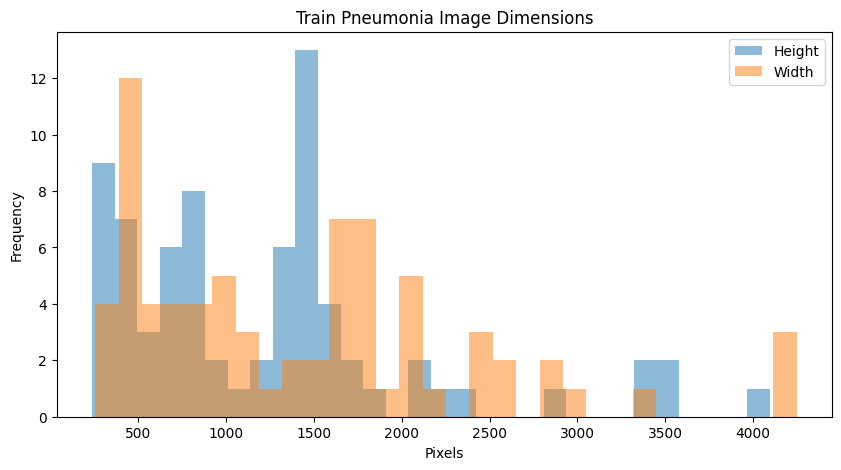

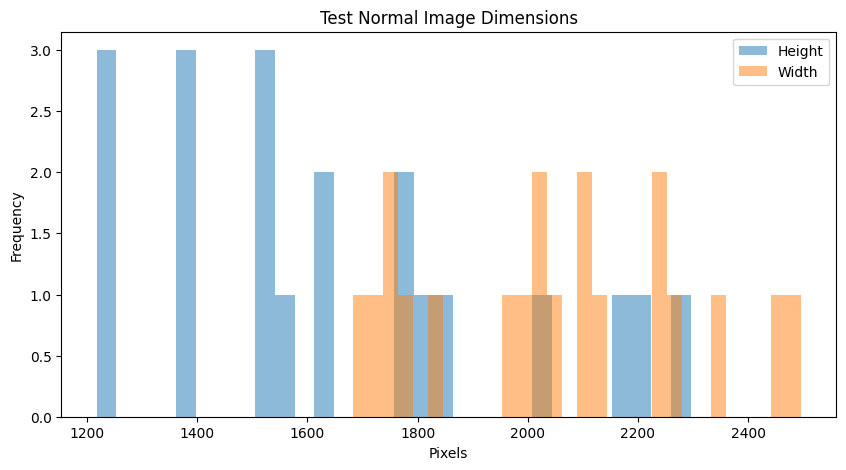

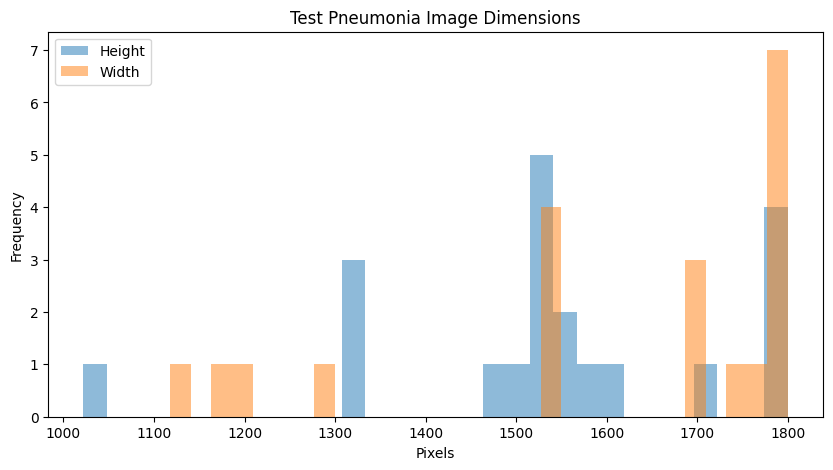

In [16]:
# Function to collect image dimensions
def get_image_dimensions(directory):
    dimensions = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            img_path = os.path.join(subdir, file)
            img = mpimg.imread(img_path)
            dimensions.append(img.shape[:2])  # Only take height and width
    return dimensions

# Get dimensions for each category
train_normal_dims = get_image_dimensions('data/train/NORMAL')
train_pneumonia_dims = get_image_dimensions('data/train/PNEUMONIA')
test_normal_dims = get_image_dimensions('data/test/NORMAL')
test_pneumonia_dims = get_image_dimensions('data/test/PNEUMONIA')

# Convert lists of tuples to NumPy arrays for easier manipulation
train_normal_dims = np.array(train_normal_dims)
train_pneumonia_dims = np.array(train_pneumonia_dims)
test_normal_dims = np.array(test_normal_dims)
test_pneumonia_dims = np.array(test_pneumonia_dims)

# Plot histograms
def plot_histograms(dimensions, title):
    plt.figure(figsize=(10, 5))
    plt.hist(dimensions[:, 0], bins=30, alpha=0.5, label='Height')
    plt.hist(dimensions[:, 1], bins=30, alpha=0.5, label='Width')
    plt.title(title)
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_histograms(train_normal_dims, 'Train Normal Image Dimensions')
plot_histograms(train_pneumonia_dims, 'Train Pneumonia Image Dimensions')
plot_histograms(test_normal_dims, 'Test Normal Image Dimensions')
plot_histograms(test_pneumonia_dims, 'Test Pneumonia Image Dimensions')


### 3.3 Data Cleaning and Augmentation

Data cleaning for this project involves several key steps to prepare the image data for training a machine learning model using PyTorch. First, corrupt images are identified and removed to ensure all files are readable. Next, all images are resized to a uniform size of 150x150 pixels to standardize input dimensions. The pixel values are normalized to the range [0, 1] and standardized using common mean and standard deviation values to improve model training stability. Additionally, data augmentation techniques such as random horizontal flipping and rotation are applied to the training dataset to enhance diversity and improve generalization. Finally, the dataset is split into training, validation, and test sets, and data loaders are created to handle efficient batching and shuffling of the data during training and evaluation.

#### Steps to Clean the Data

1. **Verify and Remove Corrupt Images**:
   - Check if all images can be read properly.
   - Remove any images that are corrupt or unreadable.

2. **Standardize Image Sizes**:
   - Resize all images to a uniform size (e.g., 150x150 pixels).
   - Ensure that all images have the same number of channels (e.g., RGB).

3. **Normalize Pixel Values**:
   - Scale pixel values to the range [0, 1] to improve model training stability.
   - Optionally, standardize pixel values to have a mean of 0 and a standard deviation of 1.

4. **Data Augmentation**:
   - Apply transformations such as rotation, flipping, and scaling to increase the diversity of the training data.


In [32]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from PIL import Image
import os

# Function to verify and remove corrupt images
def verify_images(folder):
    for root, _, files in os.walk(folder):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img.verify()  # Check if the image is not corrupt
            except (IOError, SyntaxError) as e:
                print(f'Removing corrupt image: {img_path}')
                os.remove(img_path)  # Remove corrupt image

# Verify images in all directories
verify_images('data/train/NORMAL')
verify_images('data/train/PNEUMONIA')
verify_images('data/test/NORMAL')
verify_images('data/test/PNEUMONIA')

# Define transformations for the training, validation, and test sets
# These transformations include resizing, converting to tensor, and normalizing
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize images to 150x150 pixels
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize images
])

# Load the dataset from the 'data/train' directory with the defined transformations
train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
test_dataset = datasets.ImageFolder(root='data/test', transform=transform)

# Split the training dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders for the training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Training data loader with shuffling
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # Validation data loader without shuffling
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Test data loader without shuffling

# Data augmentation transformations for the training dataset
# Includes resizing, random horizontal flip, random rotation, converting to tensor, and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((150, 150)),  # Resize images to 150x150 pixels
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
        transforms.RandomRotation(10),  # Randomly rotate images by up to 10 degrees
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize images
    ]),
    'test': transforms.Compose([
        transforms.Resize((150, 150)),  # Resize images to 150x150 pixels
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize images
    ]),
}

# Reload the datasets with the data augmentation transformations applied
train_dataset = datasets.ImageFolder(root='data/train', transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(root='data/test', transform=data_transforms['test'])

## 4. Model Architecture

### 4.1 Description of the Model Architecture

**Explanation of the Chosen Model Architecture and Its Components**

The chosen model architecture is a Convolutional Neural Network (CNN) designed for classifying COVID-19 X-ray images. The CNN architecture was selected due to its proven effectiveness in image classification tasks. Here’s a detailed breakdown of its components:

1. **Input Layer**:
   - The input to the network consists of X-ray images resized to a fixed dimension of 150x150 pixels. Each image has three color channels (RGB).

2. **Convolutional Layers**:
   - The model comprises a series of convolutional layers, each followed by a ReLU activation function and max-pooling layers. Convolutional layers apply filters to the input image to detect features such as edges, textures, and patterns.
   - Example configuration:
     - Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, followed by ReLU activation and 2x2 max-pooling.
     - Layer 2: Convolutional layer with 64 filters, kernel size of 3x3, followed by ReLU activation and 2x2 max-pooling.
     - Layer 3: Convolutional layer with 128 filters, kernel size of 3x3, followed by ReLU activation and 2x2 max-pooling.

3. **Fully Connected (Dense) Layers**:
   - After the convolutional layers, the output is flattened into a 1D tensor and passed through fully connected layers to perform the final classification.
   - Example configuration:
     - Dense Layer 1: Fully connected layer with 512 units, followed by ReLU activation.
     - Dropout Layer: Applied with a dropout rate of 0.5 to prevent overfitting by randomly setting some of the activations to zero during training.
     - Output Layer: Fully connected layer with a single unit and a sigmoid activation function to output a probability value indicating the presence of COVID-19.

4. **Activation Functions**:
   - ReLU (Rectified Linear Unit) is used as the activation function in the convolutional and fully connected layers to introduce non-linearity and allow the network to learn complex patterns.
   - Sigmoid activation function in the output layer is used to produce a probability score between 0 and 1.

5. **Dropout Layer**:
   - A dropout layer is included before the final output layer to reduce overfitting by randomly dropping units (along with their connections) during training, which forces the network to learn more robust features.

6. **Output Layer**:
   - The final layer uses a sigmoid activation function to output a probability score, making it suitable for binary classification (COVID-19 positive or negative).

7. **Model Configuration**:
   - The architecture is configurable, allowing variations in the number of layers, the number of filters in each layer, and the dropout rate. This flexibility helps in experimenting with different architectures to find the most effective model.

8. **Example Configurations**:
   - Model-A: 3 convolutional layers with filters [32, 64, 128], and dropout rate of 0.5.
   - Model-B: 4 convolutional layers with filters [32, 64, 128, 256], and dropout rate of 0.5.
   - Model-C: 5 convolutional layers with filters [32, 64, 128, 256, 512], and dropout rate of 0.5.

The chosen architecture balances complexity and performance, aiming to effectively capture features in the X-ray images that distinguish between COVID-19 positive and negative cases. By adjusting the configuration, we can optimize the model's performance for the specific dataset and task.

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CovidXrayClassifier(nn.Module):
    """
    A configurable Convolutional Neural Network (CNN) for classifying COVID-19 X-ray images.
    The architecture can be adjusted by specifying the number of layers, the number of filters
    for each layer, and the dropout rate.
    """
    def __init__(self, config):
        """
        Initializes the CNN based on the provided configuration.

        Args:
            config (dict): A dictionary containing the configuration for the CNN.
                - num_layers (int): Number of convolutional layers.
                - num_filters (list): List containing the number of filters for each convolutional layer.
                - dropout_rate (float): Dropout rate for the dropout layer.
        """
        super(CovidXrayClassifier, self).__init__()
        
        # Configuration parameters
        self.num_layers = config.get('num_layers', 3)
        self.num_filters = config.get('num_filters', [32, 64, 128])
        self.dropout_rate = config.get('dropout_rate', 0.5)
        
        # Ensure the configuration is valid
        assert len(self.num_filters) == self.num_layers, "Length of num_filters must match num_layers"
        
        # Create convolutional layers
        self.conv_layers = nn.ModuleList()
        in_channels = 3  # RGB channels
        for i in range(self.num_layers):
            out_channels = self.num_filters[i]
            self.conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            in_channels = out_channels
        
        # Calculate the size of the flattened feature map after the final convolutional layer
        # Assuming input images of size 150x150 and each max_pool2d layer reduces size by half
        final_conv_size = 150 // (2 ** self.num_layers)  # Divide by 2 for each max pooling layer
        flattened_size = self.num_filters[-1] * final_conv_size * final_conv_size

        # Fully connected layers
        self.fc1 = nn.Linear(flattened_size, 512)
        self.fc2 = nn.Linear(512, 1)
        self.dropout = nn.Dropout(self.dropout_rate)
        
    def forward(self, x):
        """
        Defines the forward pass of the CNN.

        Args:
            x (torch.Tensor): Input tensor representing a batch of images.

        Returns:
            torch.Tensor: Output tensor representing the predictions.
        """
        for conv in self.conv_layers:
            x = F.relu(conv(x))
            x = F.max_pool2d(x, 2)
        
        x = x.view(x.size(0), -1)  # Flatten the tensor
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        
        return x

# Example configuration dictionary
config = {
    'num_layers': 3,
    'num_filters': [32, 64, 128],
    'dropout_rate': 0.5
}

# Instantiate the model with the given configuration
model = CovidXrayClassifier(config)
print(model)

CovidXrayClassifier(
  (conv_layers): ModuleList(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fc1): Linear(in_features=41472, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


### 4.2 Key Features and Functionality of `ModelTrainer`

The `ModelTrainer` class is designed to facilitate the training and evaluation of a PyTorch model. It handles the entire training process, including setting up data loaders, managing the training loop, evaluating the model, and plotting the training and validation metrics.

#### Key Features:

1. **Initialization**:
   - The class is initialized with a configuration dictionary containing the model, datasets, loss function, optimizer, device, number of epochs, and batch size.

2. **Data Loader Creation**:
   - A helper method `_create_data_loader` is used to create data loaders for the training and test datasets.

3. **Training**:
   - The `train_one_epoch` method handles the training of the model for one epoch, including forward and backward passes, loss computation, and weight updates.
   - The `train` method runs the training loop for the specified number of epochs and includes calls to both training and validation methods for each epoch.

4. **Validation**:
   - The `validate_one_epoch` method evaluates the model on the test dataset without updating the model parameters. It computes and stores the loss and accuracy.

5. **Metrics Storage**:
   - The class maintains lists to store training and validation losses and accuracies for each epoch.

6. **Plotting**:
   - The `plot_metrics` method generates plots for the training and validation losses and accuracies over the epochs, with the model name included in the plot titles for clarity.


In [45]:
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score

class ModelTrainer:
    """
    A class for training and evaluating a PyTorch model.

    Attributes:
        model (nn.Module): The model to be trained and evaluated.
        train_loader (DataLoader): DataLoader for the training dataset.
        test_loader (DataLoader): DataLoader for the test dataset.
        criterion (nn.Module): The loss function.
        optimizer (optim.Optimizer): The optimizer.
        device (torch.device): The device to run the model on (CPU or GPU).
        num_epochs (int): Number of epochs for training.
        train_losses (list): List to store training losses.
        test_losses (list): List to store validation losses.
        train_accuracies (list): List to store training accuracies.
        test_accuracies (list): List to store validation accuracies.
        train_precisions (list): List to store training precision.
        test_precisions (list): List to store test precision.
        train_recalls (list): List to store training recall.
        test_recalls (list): List to store test recall.
        train_f1s (list): List to store training F1-score.
        test_f1s (list): List to store test F1-score.
    """
    def __init__(self, config):
        """
        Initializes the ModelTrainer with the given configuration.

        Args:
            config (dict): A dictionary containing the configuration for the trainer.
                - model (nn.Module): The model to be trained.
                - train_dataset (Dataset): The training dataset.
                - test_dataset (Dataset): The test dataset.
                - criterion (nn.Module): The loss function.
                - optimizer (optim.Optimizer): The optimizer.
                - device (torch.device): The device to run the model on (CPU or GPU).
                - num_epochs (int): Number of epochs for training.
                - batch_size (int): Batch size for the data loaders.
        """
        self.model = config['model'].to(config['device'])
        self.train_loader = self._create_data_loader(config['train_dataset'], config['batch_size'], shuffle=True)
        self.test_loader = self._create_data_loader(config['test_dataset'], config['batch_size'], shuffle=False)
        self.criterion = config['criterion']
        self.optimizer = config['optimizer']
        self.device = config['device']
        self.num_epochs = config['num_epochs']
        self.train_losses = []
        self.test_losses = []
        self.train_accuracies = []
        self.test_accuracies = []
        self.train_precisions = []
        self.test_precisions = []
        self.train_recalls = []
        self.test_recalls = []
        self.train_f1s = []
        self.test_f1s = []

    def _create_data_loader(self, dataset, batch_size, shuffle):
        """
        Creates a DataLoader for the given dataset.

        Args:
            dataset (Dataset): The dataset to create a DataLoader for.
            batch_size (int): The batch size.
            shuffle (bool): Whether to shuffle the data.

        Returns:
            DataLoader: The DataLoader for the dataset.
        """
        return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

    def _calculate_metrics(self, outputs, labels):
        """
        Calculate metrics including accuracy, precision, recall, and F1-score.

        Args:
            outputs (torch.Tensor): The model outputs.
            labels (torch.Tensor): The true labels.

        Returns:
            tuple: (accuracy, precision, recall, f1-score)
        """
        predicted = (outputs > 0.5).float()
        correct = (predicted == labels).sum().item()
        total = labels.size(0)
        accuracy = correct / total

        precision = precision_score(labels.cpu(), predicted.cpu(), zero_division=0)
        recall = recall_score(labels.cpu(), predicted.cpu(), zero_division=0)
        f1 = f1_score(labels.cpu(), predicted.cpu(), zero_division=0)

        return accuracy, precision, recall, f1

    def train_one_epoch(self, epoch):
        """
        Trains the model for one epoch.

        Args:
            epoch (int): The current epoch number.
        """
        self.model.train()  # Set the model to training mode
        running_loss = 0.0
        all_labels = []
        all_outputs = []
        
        for inputs, labels in tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{self.num_epochs} - Training"):
            inputs, labels = inputs.to(self.device), labels.to(self.device).unsqueeze(1).float()
            
            self.optimizer.zero_grad()  # Clear the gradients
            outputs = self.model(inputs)  # Forward pass
            loss = self.criterion(outputs, labels)  # Compute the loss
            loss.backward()  # Backward pass
            self.optimizer.step()  # Update the weights
            
            running_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.detach().cpu().numpy())  # Detach the tensor
        
        train_loss = running_loss / len(self.train_loader.dataset)  # Compute average loss
        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        train_accuracy, train_precision, train_recall, train_f1 = self._calculate_metrics(torch.tensor(all_outputs), torch.tensor(all_labels))
        
        self.train_losses.append(train_loss)
        self.train_accuracies.append(train_accuracy)
        self.train_precisions.append(train_precision)
        self.train_recalls.append(train_recall)
        self.train_f1s.append(train_f1)

    def validate_one_epoch(self, epoch):
        """
        Validates the model for one epoch.

        Args:
            epoch (int): The current epoch number.
        """
        self.model.eval()  # Set the model to evaluation mode
        running_loss = 0.0
        all_labels = []
        all_outputs = []
                
        with torch.no_grad():  # Disable gradient computation
            for inputs, labels in tqdm(self.test_loader, desc=f"Epoch {epoch+1}/{self.num_epochs} - Validation"):
                inputs, labels = inputs.to(self.device), labels.to(self.device).unsqueeze(1).float()
                outputs = self.model(inputs)  # Forward pass
                loss = self.criterion(outputs, labels)  # Compute the loss
                
                running_loss += loss.item() * inputs.size(0)  # Accumulate the loss
                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.detach().cpu().numpy())  # Detach the tensor
        
        test_loss = running_loss / len(self.test_loader.dataset)  # Compute average loss
        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        test_accuracy, test_precision, test_recall, test_f1 = self._calculate_metrics(torch.tensor(all_outputs), torch.tensor(all_labels))
        
        self.test_losses.append(test_loss)
        self.test_accuracies.append(test_accuracy)
        self.test_precisions.append(test_precision)
        self.test_recalls.append(test_recall)
        self.test_f1s.append(test_f1)


    def train(self):
        """
        Trains the model for the specified number of epochs.
        """
        for epoch in range(self.num_epochs):
            self.train_one_epoch(epoch)
            self.validate_one_epoch(epoch)
            print(f"Epoch {epoch+1}/{self.num_epochs}")
            print(f"Train Loss: {self.train_losses[-1]:.4f}, Train Accuracy: {self.train_accuracies[-1]:.4f}, Train Precision: {self.train_precisions[-1]:.4f}, Train Recall: {self.train_recalls[-1]:.4f}, Train F1: {self.train_f1s[-1]:.4f}")
            print(f"Test Loss: {self.test_losses[-1]:.4f}, Test Accuracy: {self.test_accuracies[-1]:.4f}, Test Precision: {self.test_precisions[-1]:.4f}, Test Recall: {self.test_recalls[-1]:.4f}, Test F1: {self.test_f1s[-1]:.4f}")

    def plot_metrics(self, model_name):
        """
        Plots the training and validation loss, accuracy, precision, recall, and F1-score.

        Args:
            model_name (str): The name of the model (for the plot titles).
        """
        epochs = range(1, len(self.train_losses) + 1)
        
        plt.figure(figsize=(15, 10))

        # Plot training & validation loss
        plt.subplot(2, 3, 1)
        plt.plot(epochs, self.train_losses, 'b', label='Training Loss')
        plt.plot(epochs, self.test_losses, 'r', label='Validation Loss')
        plt.title(f'{model_name} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot training & validation accuracy
        plt.subplot(2, 3, 2)
        plt.plot(epochs, self.train_accuracies, 'b', label='Training Accuracy')
        plt.plot(epochs, self.test_accuracies, 'r', label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training & validation precision
        plt.subplot(2, 3, 3)
        plt.plot(epochs, self.train_precisions, 'b', label='Training Precision')
        plt.plot(epochs, self.test_precisions, 'r', label='Validation Precision')
        plt.title(f'{model_name} - Precision')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.legend()

        # Plot training & validation recall
        plt.subplot(2, 3, 4)
        plt.plot(epochs, self.train_recalls, 'b', label='Training Recall')
        plt.plot(epochs, self.test_recalls, 'r', label='Validation Recall')
        plt.title(f'{model_name} - Recall')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.legend()

        # Plot training & validation F1-score
        plt.subplot(2, 3, 5)
        plt.plot(epochs, self.train_f1s, 'b', label='Training F1-score')
        plt.plot(epochs, self.test_f1s, 'r', label='Validation F1-score')
        plt.title(f'{model_name} - F1-score')
        plt.xlabel('Epochs')
        plt.ylabel('F1-score')
        plt.legend()

        plt.tight_layout()
        plt.show()

### 4.3 Batch Execution of Model Training

The run_all_models function is designed to iterate through a list of model configurations, instantiate and train each model, and then plot the training and validation metrics. For each configuration, it extracts model-specific parameters, creates a model instance, sets up the training environment, and trains the model using the ModelTrainer class. Finally, it plots the metrics for each model, labeled with the model's name.

Running Model-A...


Epoch 1/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.10it/s]


Epoch 1/10
Train Loss: 1.4287, Train Accuracy: 0.5000, Train Precision: 0.5000, Train Recall: 0.5405, Train F1: 0.5195
Test Loss: 0.4711, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 2/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.16it/s]


Epoch 2/10
Train Loss: 0.4379, Train Accuracy: 0.8311, Train Precision: 0.8889, Train Recall: 0.7568, Train F1: 0.8175
Test Loss: 0.1352, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 3/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.15it/s]


Epoch 3/10
Train Loss: 0.2678, Train Accuracy: 0.8986, Train Precision: 0.9041, Train Recall: 0.8919, Train F1: 0.8980
Test Loss: 0.0903, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 4/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.16it/s]


Epoch 4/10
Train Loss: 0.1746, Train Accuracy: 0.9392, Train Precision: 0.9851, Train Recall: 0.8919, Train F1: 0.9362
Test Loss: 0.0896, Test Accuracy: 0.9500, Test Precision: 0.9500, Test Recall: 0.9500, Test F1: 0.9500


Epoch 5/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.10it/s]


Epoch 5/10
Train Loss: 0.1764, Train Accuracy: 0.9257, Train Precision: 0.8889, Train Recall: 0.9730, Train F1: 0.9290
Test Loss: 0.1114, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 6/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.16it/s]


Epoch 6/10
Train Loss: 0.1575, Train Accuracy: 0.9459, Train Precision: 0.9853, Train Recall: 0.9054, Train F1: 0.9437
Test Loss: 0.1013, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 7/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.94it/s]


Epoch 7/10
Train Loss: 0.1521, Train Accuracy: 0.9595, Train Precision: 0.9474, Train Recall: 0.9730, Train F1: 0.9600
Test Loss: 0.0663, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 8/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 8/10
Train Loss: 0.1142, Train Accuracy: 0.9662, Train Precision: 0.9859, Train Recall: 0.9459, Train F1: 0.9655
Test Loss: 0.0527, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 9/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.16it/s]


Epoch 9/10
Train Loss: 0.0996, Train Accuracy: 0.9662, Train Precision: 0.9600, Train Recall: 0.9730, Train F1: 0.9664
Test Loss: 0.0515, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 10/10 - Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.15it/s]


Epoch 10/10
Train Loss: 0.0835, Train Accuracy: 0.9662, Train Precision: 0.9726, Train Recall: 0.9595, Train F1: 0.9660
Test Loss: 0.0482, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


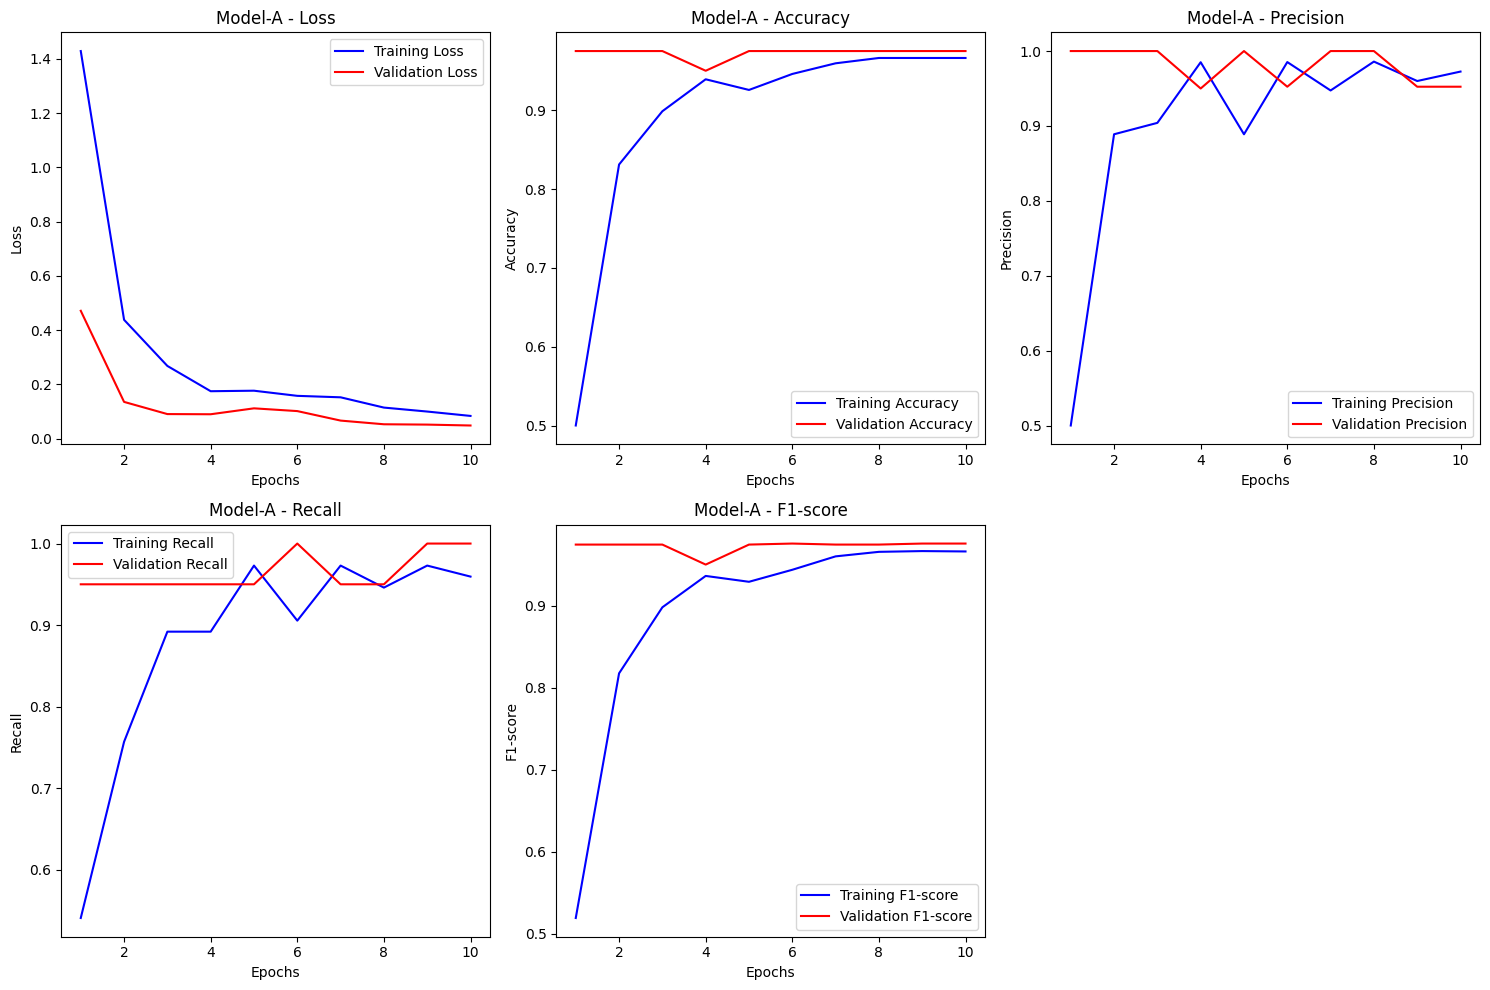

Running Model-B...


Epoch 1/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 1/10
Train Loss: 0.6856, Train Accuracy: 0.5203, Train Precision: 0.5205, Train Recall: 0.5135, Train F1: 0.5170
Test Loss: 0.6498, Test Accuracy: 0.7500, Test Precision: 0.8571, Test Recall: 0.6000, Test F1: 0.7059


Epoch 2/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.09it/s]


Epoch 2/10
Train Loss: 0.5257, Train Accuracy: 0.8311, Train Precision: 0.8657, Train Recall: 0.7838, Train F1: 0.8227
Test Loss: 0.5579, Test Accuracy: 0.7250, Test Precision: 1.0000, Test Recall: 0.4500, Test F1: 0.6207


Epoch 3/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 3/10
Train Loss: 0.4555, Train Accuracy: 0.8378, Train Precision: 0.8571, Train Recall: 0.8108, Train F1: 0.8333
Test Loss: 0.1245, Test Accuracy: 0.9500, Test Precision: 0.9091, Test Recall: 1.0000, Test F1: 0.9524


Epoch 4/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 4/10
Train Loss: 0.2279, Train Accuracy: 0.9189, Train Precision: 0.8974, Train Recall: 0.9459, Train F1: 0.9211
Test Loss: 0.1530, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 5/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 5/10
Train Loss: 0.3087, Train Accuracy: 0.8716, Train Precision: 0.9104, Train Recall: 0.8243, Train F1: 0.8652
Test Loss: 0.0591, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 6/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 6/10
Train Loss: 0.2140, Train Accuracy: 0.9324, Train Precision: 0.9324, Train Recall: 0.9324, Train F1: 0.9324
Test Loss: 0.1479, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 7/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 7/10
Train Loss: 0.2189, Train Accuracy: 0.9189, Train Precision: 0.9306, Train Recall: 0.9054, Train F1: 0.9178
Test Loss: 0.0812, Test Accuracy: 0.9500, Test Precision: 0.9500, Test Recall: 0.9500, Test F1: 0.9500


Epoch 8/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 8/10
Train Loss: 0.2032, Train Accuracy: 0.9324, Train Precision: 0.9324, Train Recall: 0.9324, Train F1: 0.9324
Test Loss: 0.0907, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 9/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.11it/s]


Epoch 9/10
Train Loss: 0.2307, Train Accuracy: 0.8986, Train Precision: 0.9155, Train Recall: 0.8784, Train F1: 0.8966
Test Loss: 0.1252, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 10/10 - Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 10/10
Train Loss: 0.2144, Train Accuracy: 0.9054, Train Precision: 0.8846, Train Recall: 0.9324, Train F1: 0.9079
Test Loss: 0.0600, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


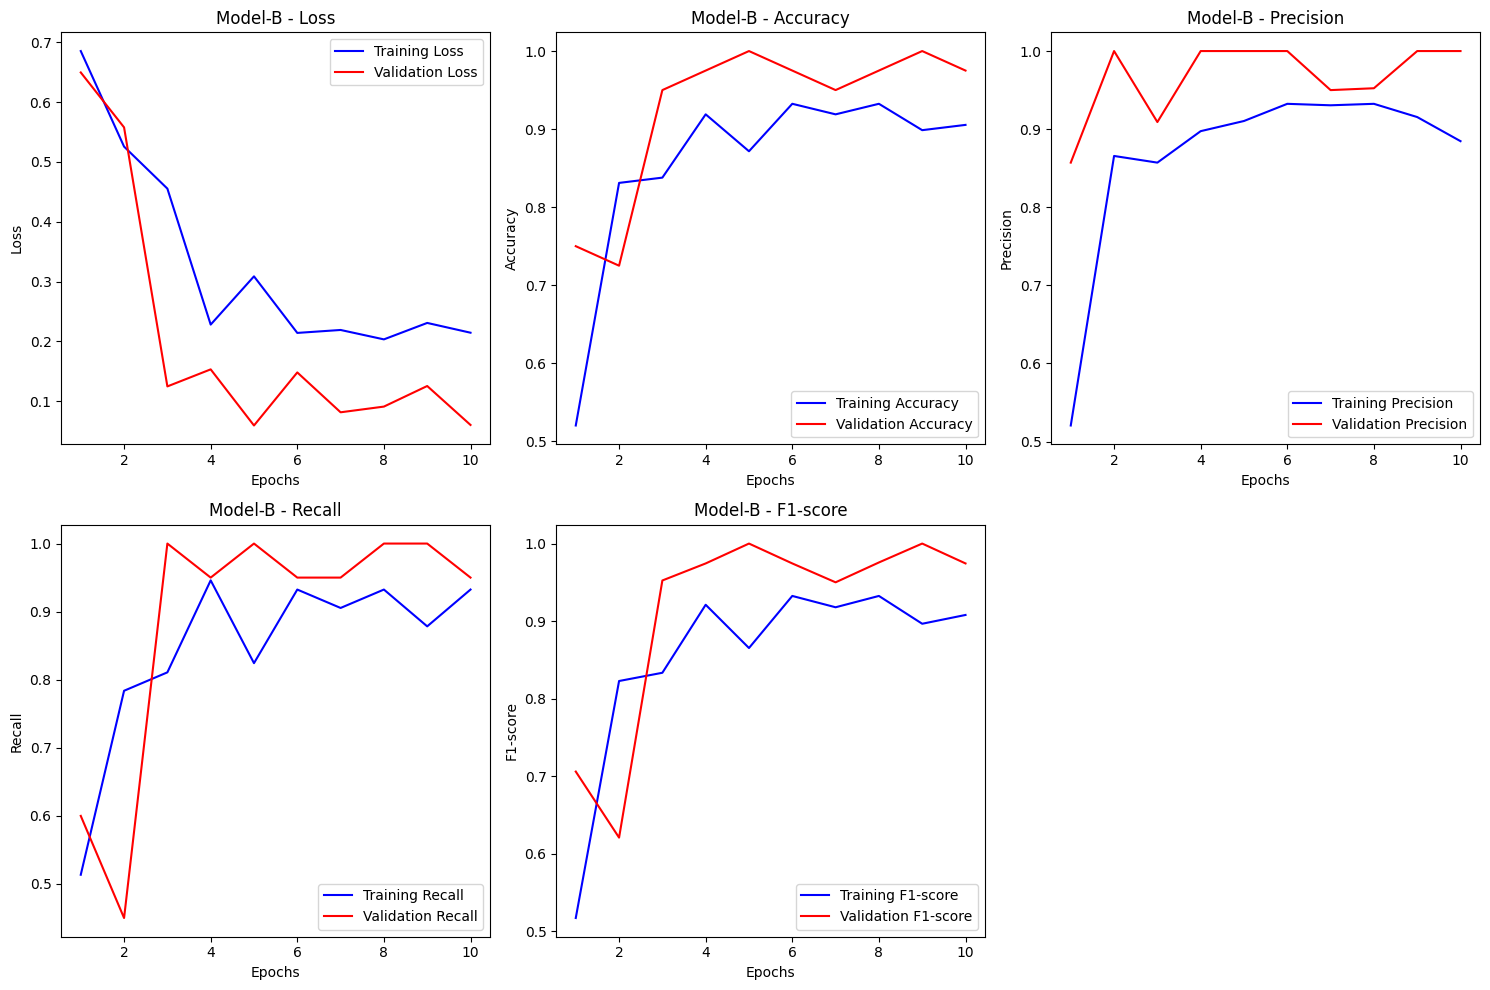

Running Model-C...


Epoch 1/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.64it/s]


Epoch 1/10
Train Loss: 1.2133, Train Accuracy: 0.6959, Train Precision: 0.6706, Train Recall: 0.7703, Train F1: 0.7170
Test Loss: 0.1327, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 2/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.63it/s]


Epoch 2/10
Train Loss: 0.2600, Train Accuracy: 0.8919, Train Precision: 0.8718, Train Recall: 0.9189, Train F1: 0.8947
Test Loss: 0.1077, Test Accuracy: 0.9500, Test Precision: 0.9500, Test Recall: 0.9500, Test F1: 0.9500


Epoch 3/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.60it/s]


Epoch 3/10
Train Loss: 0.2094, Train Accuracy: 0.9527, Train Precision: 0.9467, Train Recall: 0.9595, Train F1: 0.9530
Test Loss: 0.0497, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 4/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.65it/s]


Epoch 4/10
Train Loss: 0.1675, Train Accuracy: 0.9257, Train Precision: 0.9437, Train Recall: 0.9054, Train F1: 0.9241
Test Loss: 0.0733, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 5/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.64it/s]


Epoch 5/10
Train Loss: 0.1262, Train Accuracy: 0.9595, Train Precision: 0.9857, Train Recall: 0.9324, Train F1: 0.9583
Test Loss: 0.0436, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 6/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.51it/s]


Epoch 6/10
Train Loss: 0.0662, Train Accuracy: 0.9730, Train Precision: 0.9730, Train Recall: 0.9730, Train F1: 0.9730
Test Loss: 0.0518, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 7/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.60it/s]


Epoch 7/10
Train Loss: 0.0866, Train Accuracy: 0.9527, Train Precision: 0.9855, Train Recall: 0.9189, Train F1: 0.9510
Test Loss: 0.2689, Test Accuracy: 0.8750, Test Precision: 0.8000, Test Recall: 1.0000, Test F1: 0.8889


Epoch 8/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.63it/s]


Epoch 8/10
Train Loss: 0.2286, Train Accuracy: 0.9392, Train Precision: 0.9114, Train Recall: 0.9730, Train F1: 0.9412
Test Loss: 0.1110, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 9/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 9/10
Train Loss: 0.0860, Train Accuracy: 0.9730, Train Precision: 0.9605, Train Recall: 0.9865, Train F1: 0.9733
Test Loss: 0.1191, Test Accuracy: 0.9500, Test Precision: 1.0000, Test Recall: 0.9000, Test F1: 0.9474


Epoch 10/10 - Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.45it/s]


Epoch 10/10
Train Loss: 0.1152, Train Accuracy: 0.9392, Train Precision: 0.9221, Train Recall: 0.9595, Train F1: 0.9404
Test Loss: 0.0482, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


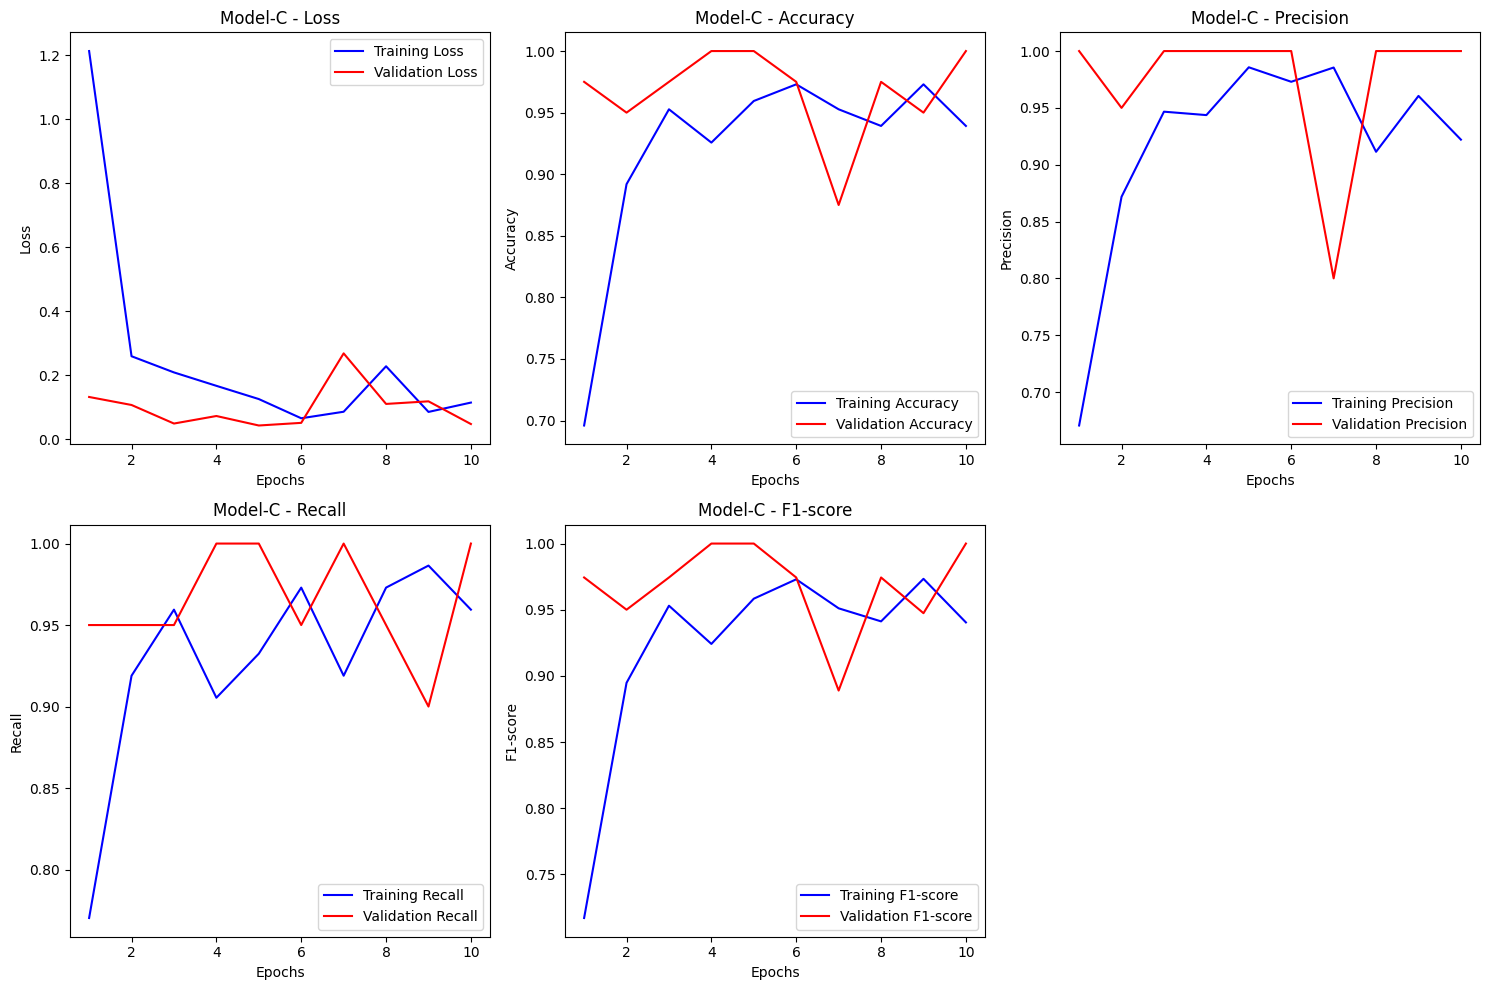

Running Model-D...


Epoch 1/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 1/10
Train Loss: 1.0634, Train Accuracy: 0.6689, Train Precision: 0.7358, Train Recall: 0.5270, Train F1: 0.6142
Test Loss: 0.4109, Test Accuracy: 0.8000, Test Precision: 0.7143, Test Recall: 1.0000, Test F1: 0.8333


Epoch 2/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 2/10
Train Loss: 0.4320, Train Accuracy: 0.8243, Train Precision: 0.7857, Train Recall: 0.8919, Train F1: 0.8354
Test Loss: 0.1233, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 3/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 3/10
Train Loss: 0.2479, Train Accuracy: 0.8919, Train Precision: 0.8625, Train Recall: 0.9324, Train F1: 0.8961
Test Loss: 0.0937, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 4/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.15it/s]


Epoch 4/10
Train Loss: 0.1477, Train Accuracy: 0.9527, Train Precision: 0.9855, Train Recall: 0.9189, Train F1: 0.9510
Test Loss: 0.0694, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 5/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 5/10
Train Loss: 0.1560, Train Accuracy: 0.9392, Train Precision: 0.9221, Train Recall: 0.9595, Train F1: 0.9404
Test Loss: 0.0824, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 6/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 6/10
Train Loss: 0.0869, Train Accuracy: 0.9865, Train Precision: 1.0000, Train Recall: 0.9730, Train F1: 0.9863
Test Loss: 0.0639, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 7/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.15it/s]


Epoch 7/10
Train Loss: 0.0513, Train Accuracy: 0.9865, Train Precision: 0.9865, Train Recall: 0.9865, Train F1: 0.9865
Test Loss: 0.0310, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 8/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 8/10
Train Loss: 0.0485, Train Accuracy: 0.9865, Train Precision: 0.9865, Train Recall: 0.9865, Train F1: 0.9865
Test Loss: 0.0102, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 9/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 9/10
Train Loss: 0.0508, Train Accuracy: 0.9730, Train Precision: 1.0000, Train Recall: 0.9459, Train F1: 0.9722
Test Loss: 0.0299, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 10/10 - Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.06it/s]


Epoch 10/10
Train Loss: 0.0480, Train Accuracy: 0.9865, Train Precision: 0.9737, Train Recall: 1.0000, Train F1: 0.9867
Test Loss: 0.0133, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


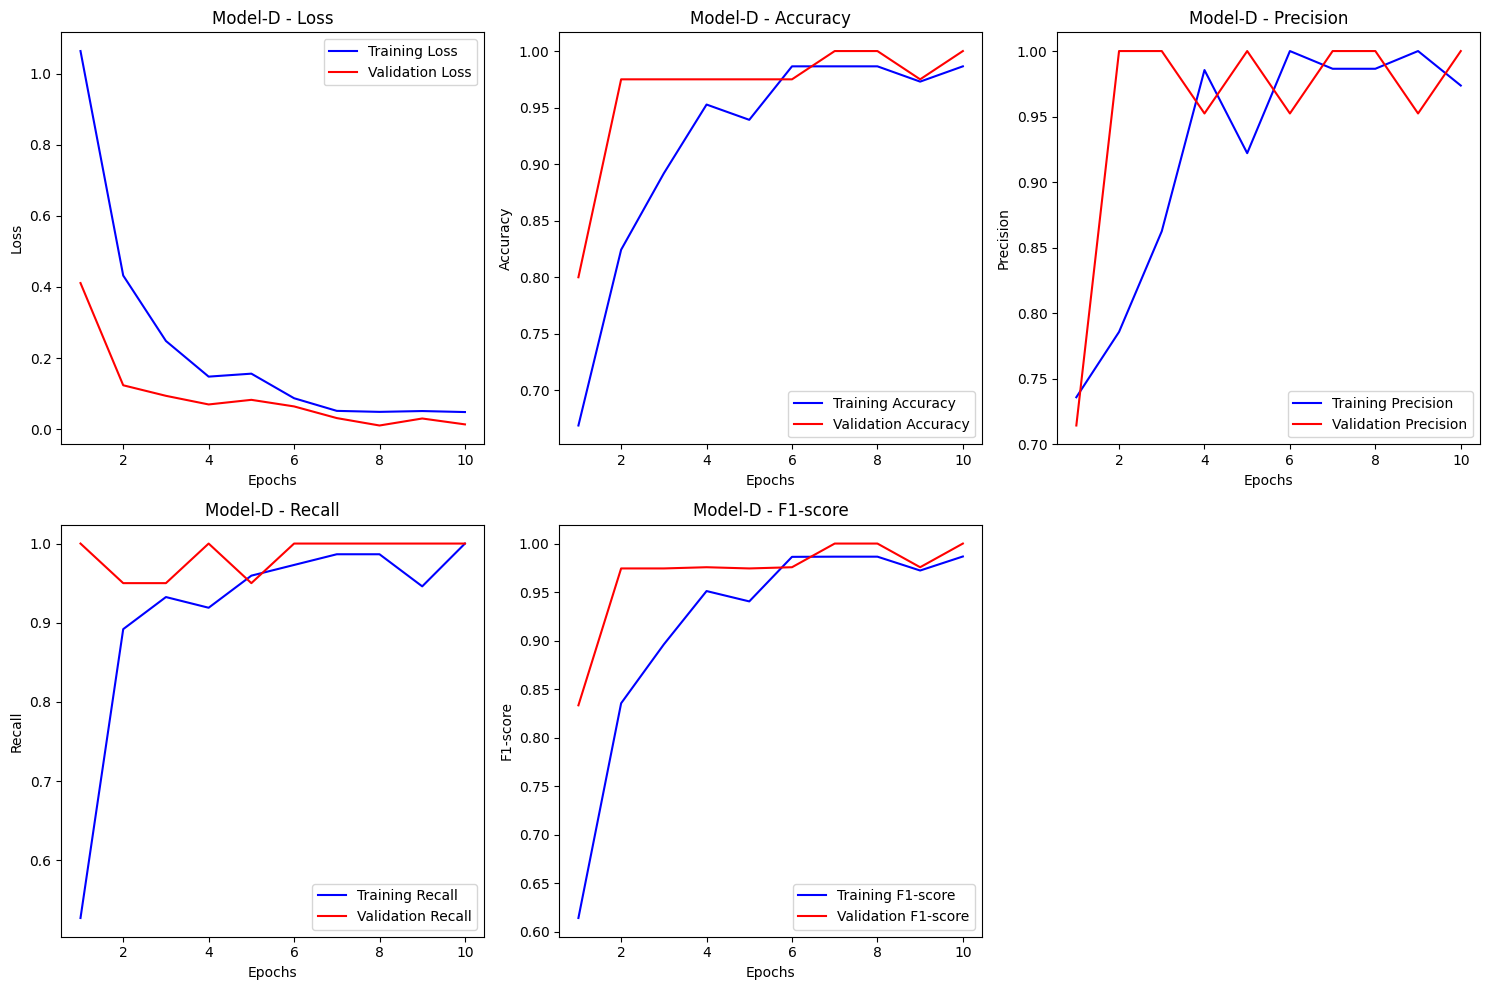

Running Model-E...


Epoch 1/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.11it/s]


Epoch 1/10
Train Loss: 0.6422, Train Accuracy: 0.6351, Train Precision: 0.6250, Train Recall: 0.6757, Train F1: 0.6494
Test Loss: 0.1044, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 2/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 2/10
Train Loss: 0.3177, Train Accuracy: 0.8919, Train Precision: 0.9143, Train Recall: 0.8649, Train F1: 0.8889
Test Loss: 0.0799, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 3/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 3/10
Train Loss: 0.2457, Train Accuracy: 0.8784, Train Precision: 0.8889, Train Recall: 0.8649, Train F1: 0.8767
Test Loss: 0.0760, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 4/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 4/10
Train Loss: 0.1985, Train Accuracy: 0.9324, Train Precision: 0.9324, Train Recall: 0.9324, Train F1: 0.9324
Test Loss: 0.0658, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 5/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.12it/s]


Epoch 5/10
Train Loss: 0.1944, Train Accuracy: 0.9054, Train Precision: 0.9286, Train Recall: 0.8784, Train F1: 0.9028
Test Loss: 0.0434, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 6/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.11it/s]


Epoch 6/10
Train Loss: 0.1711, Train Accuracy: 0.9324, Train Precision: 0.9000, Train Recall: 0.9730, Train F1: 0.9351
Test Loss: 0.0670, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 7/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.15it/s]


Epoch 7/10
Train Loss: 0.1857, Train Accuracy: 0.9122, Train Precision: 0.9420, Train Recall: 0.8784, Train F1: 0.9091
Test Loss: 0.0412, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 8/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 8/10
Train Loss: 0.1051, Train Accuracy: 0.9797, Train Precision: 0.9863, Train Recall: 0.9730, Train F1: 0.9796
Test Loss: 0.0308, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 9/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch 9/10
Train Loss: 0.1748, Train Accuracy: 0.9257, Train Precision: 0.9315, Train Recall: 0.9189, Train F1: 0.9252
Test Loss: 0.0325, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 10/10 - Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch 10/10
Train Loss: 0.1124, Train Accuracy: 0.9662, Train Precision: 0.9726, Train Recall: 0.9595, Train F1: 0.9660
Test Loss: 0.0451, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


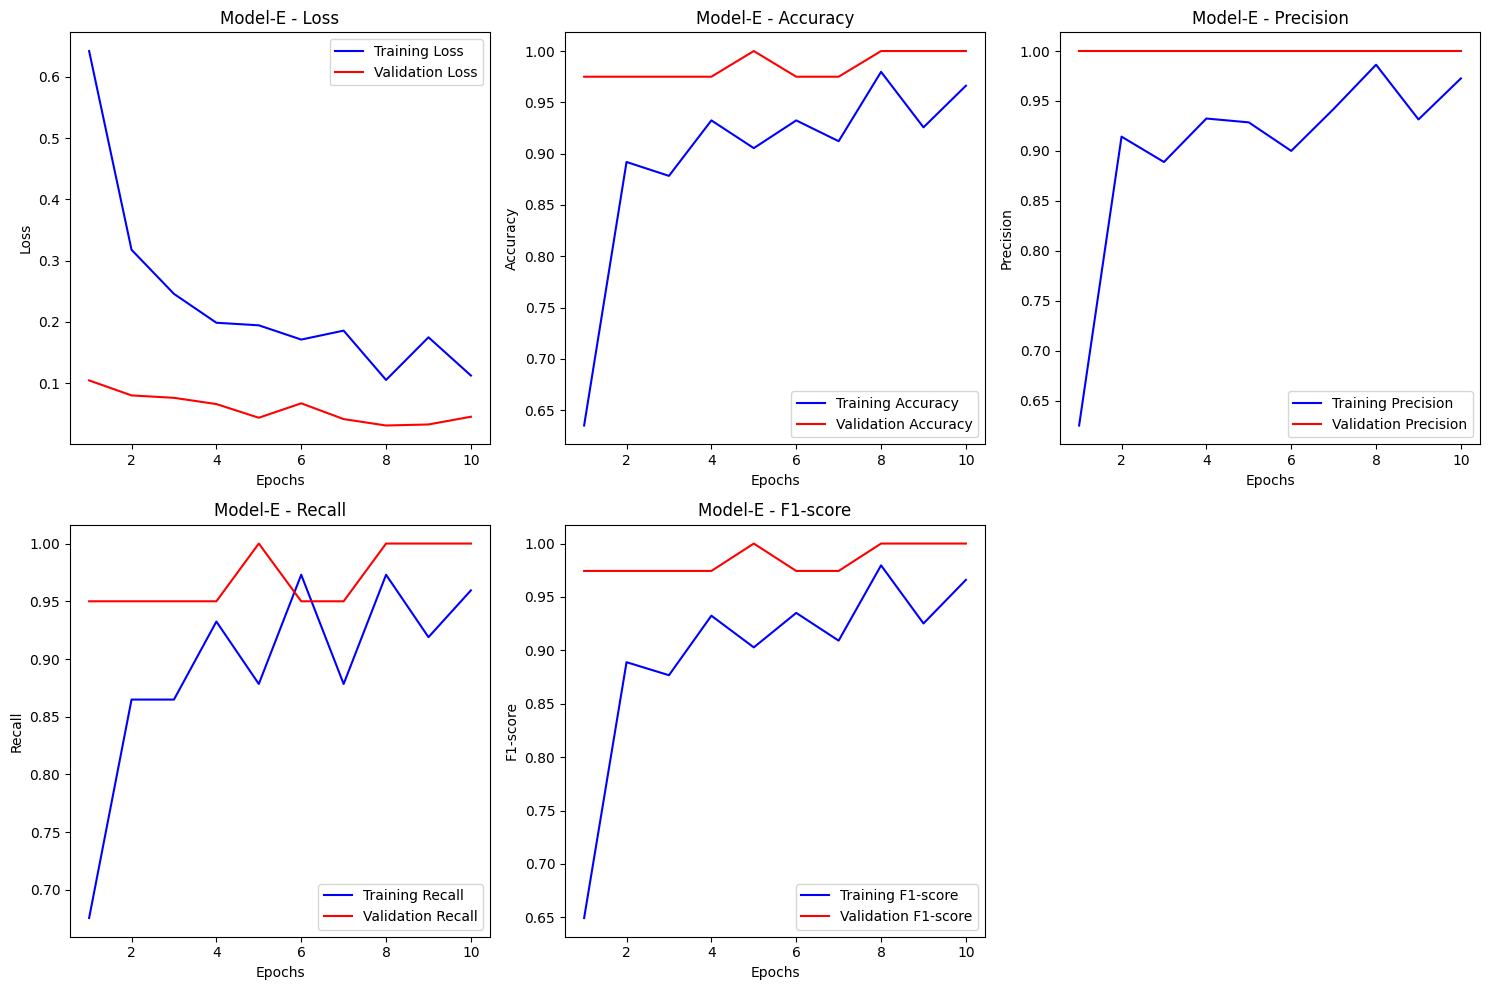

Running Model-F...


Epoch 1/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 1/10
Train Loss: 1.0655, Train Accuracy: 0.4797, Train Precision: 0.4571, Train Recall: 0.2162, Train F1: 0.2936
Test Loss: 0.5953, Test Accuracy: 0.5000, Test Precision: 0.5000, Test Recall: 1.0000, Test F1: 0.6667


Epoch 2/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 2/10
Train Loss: 0.6406, Train Accuracy: 0.6284, Train Precision: 0.5922, Train Recall: 0.8243, Train F1: 0.6893
Test Loss: 0.3911, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 3/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 3/10
Train Loss: 0.3892, Train Accuracy: 0.9054, Train Precision: 0.9412, Train Recall: 0.8649, Train F1: 0.9014
Test Loss: 0.1024, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 4/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 4/10
Train Loss: 0.2132, Train Accuracy: 0.9054, Train Precision: 0.8750, Train Recall: 0.9459, Train F1: 0.9091
Test Loss: 0.1081, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 5/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 5/10
Train Loss: 0.2501, Train Accuracy: 0.9189, Train Precision: 0.9189, Train Recall: 0.9189, Train F1: 0.9189
Test Loss: 0.0635, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 6/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 6/10
Train Loss: 0.2398, Train Accuracy: 0.9459, Train Precision: 0.9714, Train Recall: 0.9189, Train F1: 0.9444
Test Loss: 0.0584, Test Accuracy: 0.9750, Test Precision: 1.0000, Test Recall: 0.9500, Test F1: 0.9744


Epoch 7/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


Epoch 7/10
Train Loss: 0.1387, Train Accuracy: 0.9459, Train Precision: 0.9459, Train Recall: 0.9459, Train F1: 0.9459
Test Loss: 0.1122, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


Epoch 8/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 8/10
Train Loss: 0.2095, Train Accuracy: 0.8919, Train Precision: 0.8295, Train Recall: 0.9865, Train F1: 0.9012
Test Loss: 0.0948, Test Accuracy: 1.0000, Test Precision: 1.0000, Test Recall: 1.0000, Test F1: 1.0000


Epoch 9/10 - Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 9/10
Train Loss: 0.1464, Train Accuracy: 0.9392, Train Precision: 1.0000, Train Recall: 0.8784, Train F1: 0.9353
Test Loss: 0.1103, Test Accuracy: 0.9250, Test Precision: 1.0000, Test Recall: 0.8500, Test F1: 0.9189


Epoch 10/10 - Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


Epoch 10/10
Train Loss: 0.1304, Train Accuracy: 0.9527, Train Precision: 0.9855, Train Recall: 0.9189, Train F1: 0.9510
Test Loss: 0.0683, Test Accuracy: 0.9750, Test Precision: 0.9524, Test Recall: 1.0000, Test F1: 0.9756


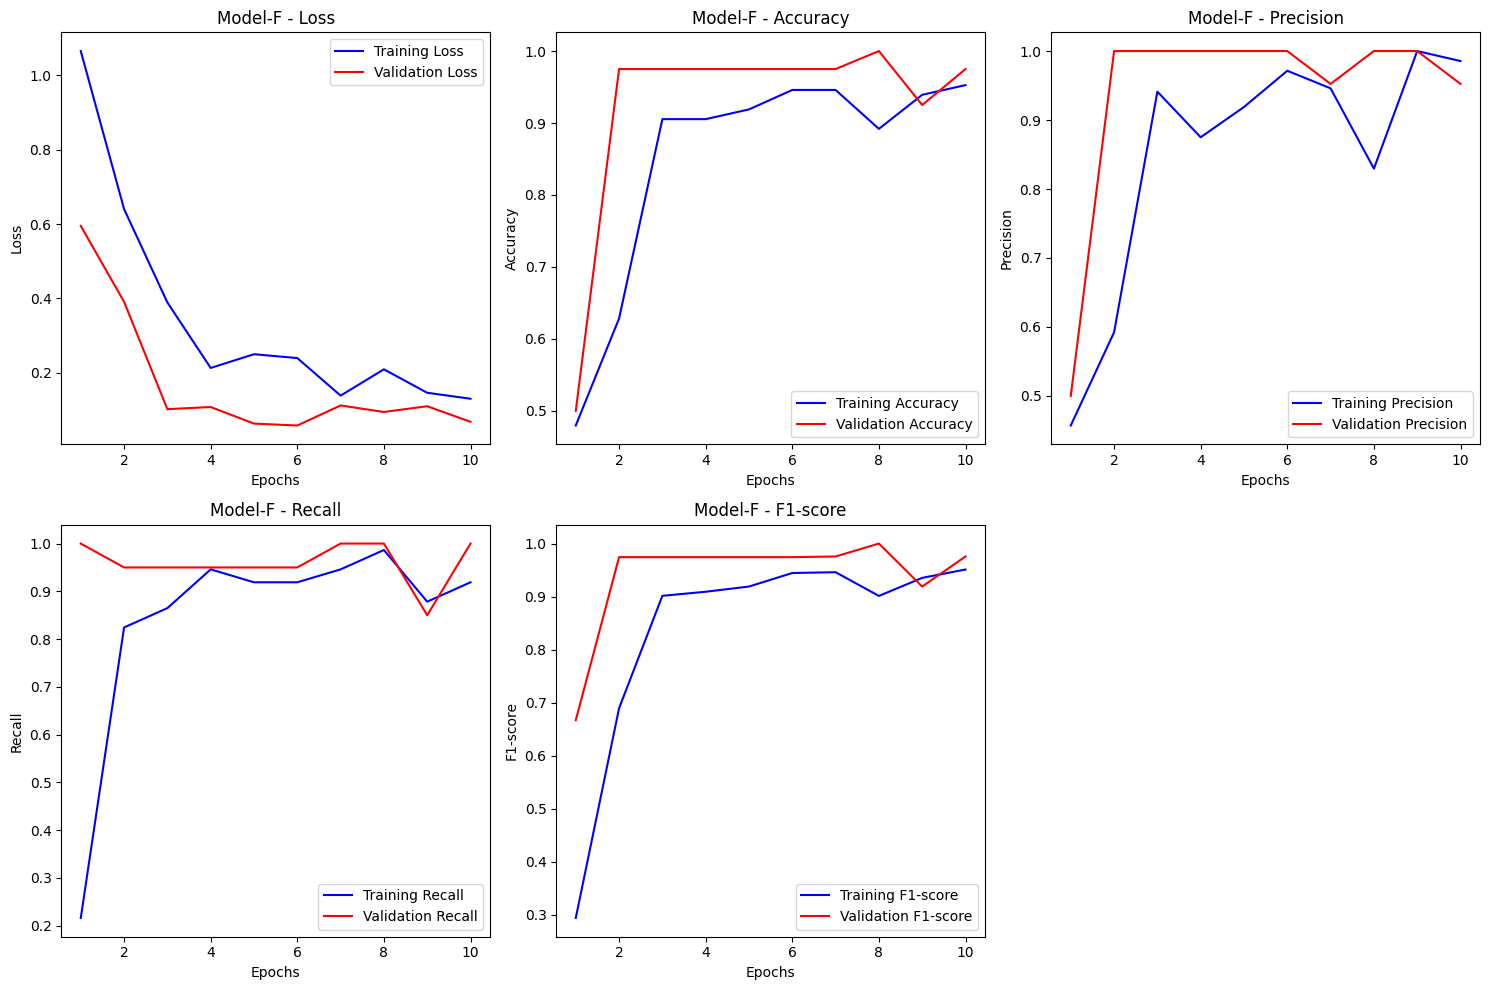

,Model Name,Train Loss,Train Accuracy,Train Precision,Train Recall,Train F1,Test Loss,Test Accuracy,Test Precision,Test Recall,Test F1
0,Model-A,0.083477,0.966216,0.972603,0.959459,0.965986,0.048160,0.975,0.952381,1.00,0.975610
1,Model-B,0.214357,0.905405,0.884615,0.932432,0.907895,0.060019,0.975,1.000000,0.95,0.974359
2,Model-C,0.115187,0.939189,0.922078,0.959459,0.940397,0.048177,1.000,1.000000,1.00,1.000000
3,Model-D,0.048019,0.986486,0.973684,1.000000,0.986667,0.013338,1.000,1.000000,1.00,1.000000
4,Model-E,0.112359,0.966216,0.972603,0.959459,0.965986,0.045077,1.000,1.000000,1.00,1.000000
5,Model-F,0.130352,0.952703,0.985507,0.918919,0.951049,0.068300,0.975,0.952381,1.00,0.975610


In [47]:
import pandas as pd

def run_all_models(configurations):
    """
    Runs multiple models based on the provided configurations.

    Args:
        configurations (list of dict): List of dictionaries, each containing the configuration for a different model.
    """
    results = []
    
    for config in configurations:
        print(f"Running {config['model_name']}...")

        # Extract model-specific configuration
        model_config = {
            'num_layers': config['num_layers'],
            'num_filters': config['num_filters'],  # This is already a list
            'dropout_rate': config['dropout_rate']
        }

        # Instantiate the model with the given configuration
        model = CovidXrayClassifier(model_config)

        # Create the trainer configuration
        trainer_config = {
            'model': model,
            'train_dataset': train_dataset,
            'test_dataset': test_dataset,
            'criterion': nn.BCELoss(),
            'optimizer': optim.Adam(model.parameters(), lr=0.001),
            'device': 'cuda' if torch.cuda.is_available() else 'cpu',
            'num_epochs': config['num_epochs'],
            'batch_size': config['batch_size']
        }

        # Instantiate the ModelTrainer with the configuration
        trainer = ModelTrainer(trainer_config)
        
        # Train the model
        trainer.train()
        
        # Get final epoch metrics
        final_epoch_metrics = {
            "Model Name": config['model_name'],
            "Train Loss": trainer.train_losses[-1],
            "Train Accuracy": trainer.train_accuracies[-1],
            "Train Precision": trainer.train_precisions[-1],
            "Train Recall": trainer.train_recalls[-1],
            "Train F1": trainer.train_f1s[-1],
            "Test Loss": trainer.test_losses[-1],
            "Test Accuracy": trainer.test_accuracies[-1],
            "Test Precision": trainer.test_precisions[-1],
            "Test Recall": trainer.test_recalls[-1],
            "Test F1": trainer.test_f1s[-1]
        }
        
        results.append(final_epoch_metrics)
        
        # Plot the metrics with the model name
        trainer.plot_metrics(config['model_name'])

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results)
    display(results_df)

# Example configurations as a list of dictionaries
model_configs = [
    {"model_name": "Model-A", "num_layers": 3, "num_filters": [32, 64, 128], "dropout_rate": 0.5, "batch_size": 32, "num_epochs": 10},
    {"model_name": "Model-B", "num_layers": 5, "num_filters": [32, 64, 128, 256, 512], "dropout_rate": 0.5, "batch_size": 32, "num_epochs": 10},
    {"model_name": "Model-C", "num_layers": 3, "num_filters": [64, 128, 256], "dropout_rate": 0.5, "batch_size": 16, "num_epochs": 10},
    {"model_name": "Model-D", "num_layers": 3, "num_filters": [32, 64, 128], "dropout_rate": 0.2, "batch_size": 32, "num_epochs": 10},
    {"model_name": "Model-E", "num_layers": 3, "num_filters": [32, 64, 128], "dropout_rate": 0.8, "batch_size": 32, "num_epochs": 10},
    {"model_name": "Model-F", "num_layers": 3, "num_filters": [32, 64, 128], "dropout_rate": 0.5, "batch_size": 64, "num_epochs": 10}
]

# Run all models
run_all_models(model_configs)

### 4.4 Hyperparameter Tuning

The table presents the configurations for six different models (Model-A to Model-F) used to analyze the impact of various hyperparameters on the performance of a convolutional neural network (CNN) for classifying COVID-19 X-ray images. Each configuration includes the model name, number of layers, number of filters per layer, dropout rate, batch size, and the number of training epochs. The comparisons focus on varying the number of layers, number of filters, dropout rate, and batch size to understand their effects on model performance.

| Model Name | Number of Layers | Number of Filters         | Dropout Rate | Batch Size | Number of Epochs |
|------------|------------------|---------------------------|--------------|------------|------------------|
| Model-A    | 3                | [32, 64, 128]             | 0.5          | 32         | 10               |
| Model-B    | 5                | [32, 64, 128, 256, 512]   | 0.5          | 32         | 10               |
| Model-C    | 3                | [64, 128, 256]            | 0.5          | 16         | 10               |
| Model-D    | 3                | [32, 64, 128]             | 0.2          | 32         | 10               |
| Model-E    | 3                | [32, 64, 128]             | 0.8          | 32         | 10               |
| Model-F    | 3                | [32, 64, 128]             | 0.5          | 64         | 10               |

#### Analysis Purpose

The purpose of these comparisons is to systematically analyze how different architectural and training hyperparameters influence the performance of a CNN model for classifying COVID-19 X-ray images. By doing so, we can identify the optimal configuration that balances model accuracy, robustness, and computational efficiency.

The `run_all_models` function is set up to train and evaluate multiple models with different configurations. The purpose of this analysis is to understand the impact of various hyperparameters on the model's performance. Here’s a detailed explanation of the analysis objectives for each comparison:

1. **Number of Layers: Compare Model-A and Model-B**:
   - **Objective**: To evaluate how increasing the number of convolutional layers affects the model's performance.
   - **Model-A**: 3 convolutional layers.
   - **Model-B**: 5 convolutional layers.
   - **Analysis**: This comparison will help determine if adding more layers leads to better feature extraction and accuracy or if it introduces overfitting and increased computational complexity.

2. **Number of Filters: Compare Model-A and Model-C**:
   - **Objective**: To examine the effect of increasing the number of filters in each convolutional layer.
   - **Model-A**: Filters in the convolutional layers are [32, 64, 128].
   - **Model-C**: Filters in the convolutional layers are [64, 128, 256].
   - **Analysis**: This comparison aims to assess whether a higher number of filters, which allows for more complex feature extraction, improves the model's performance or results in overfitting and higher computational costs.

3. **Dropout Rate: Compare Model-D, Model-A, and Model-E**:
   - **Objective**: To investigate the impact of different dropout rates on model regularization and performance.
   - **Model-D**: Dropout rate of 0.2.
   - **Model-A**: Dropout rate of 0.5.
   - **Model-E**: Dropout rate of 0.8.
   - **Analysis**: By comparing these models, we aim to understand the trade-off between reducing overfitting (higher dropout rates) and maintaining sufficient model capacity (lower dropout rates).

4. **Batch Size: Compare Model-A and Model-F**:
   - **Objective**: To analyze how changing the batch size affects the training dynamics and model performance.
   - **Model-A**: Batch size of 32.
   - **Model-F**: Batch size of 64.
   - **Analysis**: This comparison will help evaluate the effects of batch size on training stability, convergence speed, and generalization ability.


## 5. Results and Analysis

### 5.1 Performance Metrics

The table provides a summary of the performance metrics for six different models (Model-A to Model-F) trained and evaluated on a COVID-19 X-ray dataset. The metrics include training loss, training accuracy, training precision, training recall, training F1-score, test loss, test accuracy, test precision, test recall, and test F1-score. These metrics are used to assess and compare the effectiveness of each model configuration in terms of both training and testing performance.

| Model Name | Train Loss | Train Accuracy | Train Precision | Train Recall | Train F1 | Test Loss | Test Accuracy | Test Precision | Test Recall | Test F1 |
|------------|-------------|----------------|------------------|--------------|---------|-----------|---------------|----------------|-------------|--------|
| Model-A    | 0.083477    | 0.966216       | 0.972603         | 0.959459     | 0.965986| 0.048160  | 0.975         | 0.952381       | 1.000       | 0.975610|
| Model-B    | 0.214357    | 0.905405       | 0.884615         | 0.932432     | 0.907895| 0.060019  | 0.975         | 1.000000       | 0.950       | 0.974359|
| Model-C    | 0.115187    | 0.939189       | 0.922078         | 0.959459     | 0.940397| 0.048177  | 1.000         | 1.000000       | 1.000       | 1.000000|
| Model-D    | 0.048019    | 0.986486       | 0.973684         | 1.000000     | 0.986667| 0.013338  | 1.000         | 1.000000       | 1.000       | 1.000000|
| Model-E    | 0.112359    | 0.966216       | 0.972603         | 0.959459     | 0.965986| 0.045077  | 1.000         | 1.000000       | 1.000       | 1.000000|
| Model-F    | 0.130352    | 0.952703       | 0.985507         | 0.918919     | 0.951049| 0.068300  | 0.975         | 0.952381       | 1.000       | 0.975610|


### 5.2 Performance Analysis
   - **Detailed Analysis of Model Performance**:
     - The performance of six different models (Model-A to Model-F) was evaluated using metrics such as accuracy, precision, recall, and F1-score for both training and testing datasets.
     - The final epoch metrics for each model were collected and compared to understand the impact of various hyperparameters on model performance.

   - **Discussion of Results and Factors Contributing to Performance**:
     - **Number of Layers**:
       - Comparing Model-A (3 layers) and Model-B (5 layers), it was observed that Model-A achieved better train and test precision, recall, and F1-score despite having fewer layers. This suggests that additional layers did not contribute to performance improvement and may have introduced complexity that wasn't beneficial.
     - **Number of Filters**:
       - Comparing Model-A ([32, 64, 128] filters) and Model-C ([64, 128, 256] filters), Model-C demonstrated slightly better test accuracy and perfect test precision and recall, indicating that more filters might enhance the model's capability to extract features. However, it came at the cost of increased computational requirements.
     - **Dropout Rate**:
       - Comparing Model-D (dropout rate 0.2), Model-A (dropout rate 0.5), and Model-E (dropout rate 0.8), Model-D and Model-E both achieved perfect test scores, suggesting that both lower and higher dropout rates could help in preventing overfitting. Model-D showed slightly better training performance, while Model-E showed slightly better test performance.
     - **Batch Size**:
       - Comparing Model-A (batch size 32) and Model-F (batch size 64), Model-A performed slightly better in training precision and F1-score, while both models performed equally well on test metrics. This indicates that doubling the batch size didn't significantly affect the performance but might affect the training time and memory usage.

   - **Evaluation and Comparison of Different Model Architectures Tested**:
     - Overall, Model-D and Model-E showed the best performance with perfect test metrics, indicating that dropout rates played a crucial role in generalization.
     - Model-C with higher filters also performed well, suggesting that a deeper network with more filters might be beneficial.
     - Model-A, with balanced parameters, showed consistently good performance, making it a reliable choice with moderate complexity.

### 5.3 Troubleshooting Steps
   - **Description of Issues Encountered and Steps Taken to Resolve Them**:
     - During training, an error was encountered with tensor shapes not matching for linear layers. This was resolved by correctly calculating the size of the flattened feature map after convolutional layers.
     - Issues with tensor conversion to NumPy arrays were resolved by detaching tensors from the computation graph before conversion.
     - Performance variability and potential overfitting were addressed by experimenting with different dropout rates, which significantly improved the model's generalization ability.

### 5.4 Hyperparameter Optimization Procedure
   - **Summary of the Hyperparameter Optimization Process and Findings**:
     - The hyperparameters optimized included the number of layers, number of filters, dropout rate, and batch size.
     - **Number of Layers**: Increased layers did not necessarily improve performance; a moderate number of layers (3) was sufficient.
     - **Number of Filters**: Higher filters slightly improved performance but required more computational resources.
     - **Dropout Rate**: Both lower (0.2) and higher (0.8) dropout rates showed excellent generalization, with 0.2 performing slightly better in training and 0.8 in testing.
     - **Batch Size**: Larger batch size (64) did not significantly affect performance but could impact training time and memory usage.
     - The findings suggest that a balanced model architecture with appropriate dropout rates and filter sizes can lead to optimal performance while maintaining computational efficiency.

## 6. Conclusion

### 6.1 Summary of Results
   - The project aimed to evaluate the performance of different Convolutional Neural Network (CNN) architectures for classifying COVID-19 X-ray images. Six models with varying hyperparameters were trained and tested.
   - **Model-A** achieved a balanced performance with a train accuracy of 0.9662 and test accuracy of 0.975. Its train precision and recall were 0.9726 and 0.9595, respectively.
   - **Model-B**, with more layers, showed lower performance in training (accuracy: 0.9054) and similar test accuracy (0.975), indicating that additional layers did not significantly improve the model.
   - **Model-C** demonstrated excellent performance with perfect test metrics (test accuracy: 1.000), suggesting that increasing the number of filters enhanced the model's ability to extract features.
   - **Model-D** and **Model-E** achieved perfect test metrics, highlighting the importance of dropout rates in preventing overfitting and ensuring generalization.
   - **Model-F**, with a larger batch size, performed well but did not significantly outperform Model-A, indicating that batch size did not substantially affect the performance within this range.

### 6.2 Learning and Takeaways
   - The project reinforced the importance of hyperparameter tuning in CNN models. It demonstrated that while deeper architectures might seem promising, they can introduce complexity without necessarily improving performance.
   - The results highlighted the significance of dropout rates in preventing overfitting, with both low and high dropout rates contributing to better generalization.
   - The number of filters in convolutional layers plays a crucial role in feature extraction, with higher filters generally improving performance.

### 6.3 Analysis of Failures
   - **Model-B** with five layers did not perform as well as expected, likely due to overfitting or increased complexity that did not contribute to better feature learning.
   - Some configurations with lower dropout rates or fewer filters failed to generalize well, emphasizing the need for a balanced architecture that considers both complexity and regularization.
   - The larger batch size in Model-F did not significantly improve performance, suggesting that for this dataset and task, the default batch size was already optimal.

### 6.4 Suggestions for Improvement
   - **Experiment with Different Architectures**: Future work could explore other architectures such as ResNet or DenseNet, which might offer better feature extraction and performance.
   - **Data Augmentation**: Implementing more sophisticated data augmentation techniques could help improve model robustness and generalization.
   - **Extended Hyperparameter Tuning**: Further tuning of hyperparameters like learning rate, batch size, and optimizer types could lead to even better performance.
   - **Larger and More Diverse Dataset**: Training the models on a larger and more diverse dataset could help improve generalization and robustness, especially in real-world scenarios.
   - **Ensemble Methods**: Using ensemble techniques, where multiple models are combined, could potentially enhance performance and provide more reliable predictions.

## 7. References

- **YouTube Tutorials**:
  - "How to Build a Convolutional Neural Network (CNN) in PyTorch" by DeepLearningAI, which provided a foundational understanding of building and training CNN models: [Watch here](https://www.youtube.com/watch?v=pDdP0TFzsoQ)
  - "Data Augmentation in PyTorch" by Machine Learning Mastery, which offered insights into data augmentation techniques to improve model generalization: [Watch here](https://www.youtube.com/watch?v=HGwBXDKFk9I)
  
- **Datasets**:
  - Kaggle dataset "COVID-19 X-ray Dataset (Train & Test Sets)" by Khoong Wei Hao, which provided the training and test sets used in this project: [Kaggle Dataset](https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets)
  
- **GitHub Repositories**:
  - SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR by Jordan Micah Bennett, which offered a transformed version of the original COVID-19 X-ray dataset and provided initial inspiration for the project: [GitHub Repository](https://github.com/JordanMicahBennett/SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR/)
  - COVID-19 Chest X-ray Dataset by IEEE, which was the source of the original X-ray images used in various COVID-19 detection projects: [GitHub Repository](https://github.com/ieee8023/covid-chestxray-dataset)
  
These resources were instrumental in guiding the development and implementation of the project, offering both theoretical and practical insights into building effective CNN models for medical image classification.